1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [76]:
#pip install imblearn
from imblearn.over_sampling import SMOTE

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
robscale = RobustScaler()

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

2. Extracting Data

In [3]:
ccf = pd.read_csv('creditcard.csv')
ccf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
ccf.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
ccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
ccf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
ccf['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
ccf['Time'].value_counts()

Time
163152.0    36
64947.0     26
68780.0     25
3767.0      21
3770.0      20
            ..
127750.0     1
62260.0      1
62259.0      1
127753.0     1
172792.0     1
Name: count, Length: 124592, dtype: int64

In [9]:
ccf.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

3. EDA and Visualization

In [10]:
corr= ccf.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


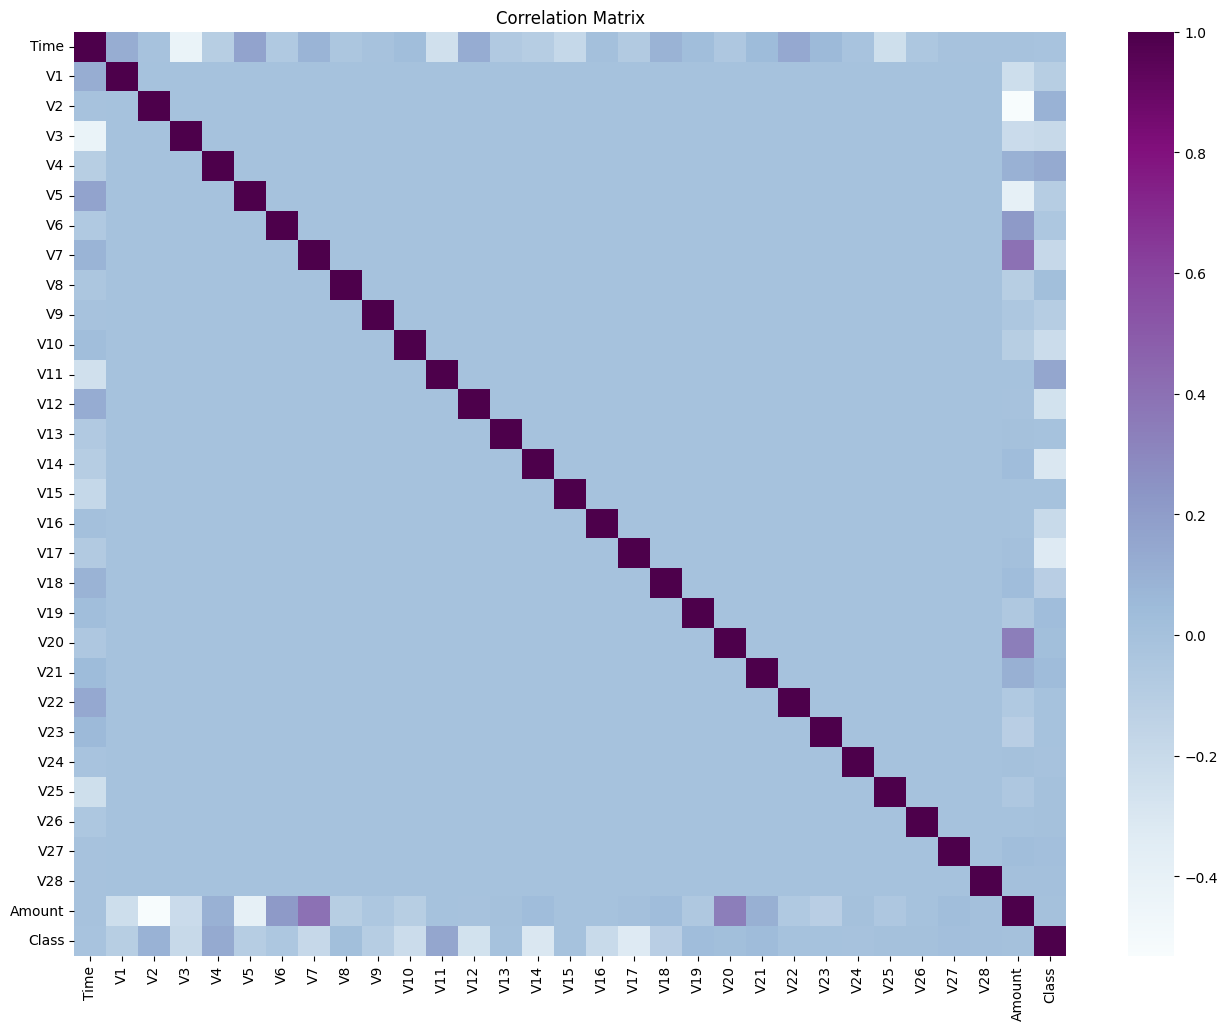

In [11]:
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot = False, cmap = "BuPu")
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='Class', ylabel='count'>

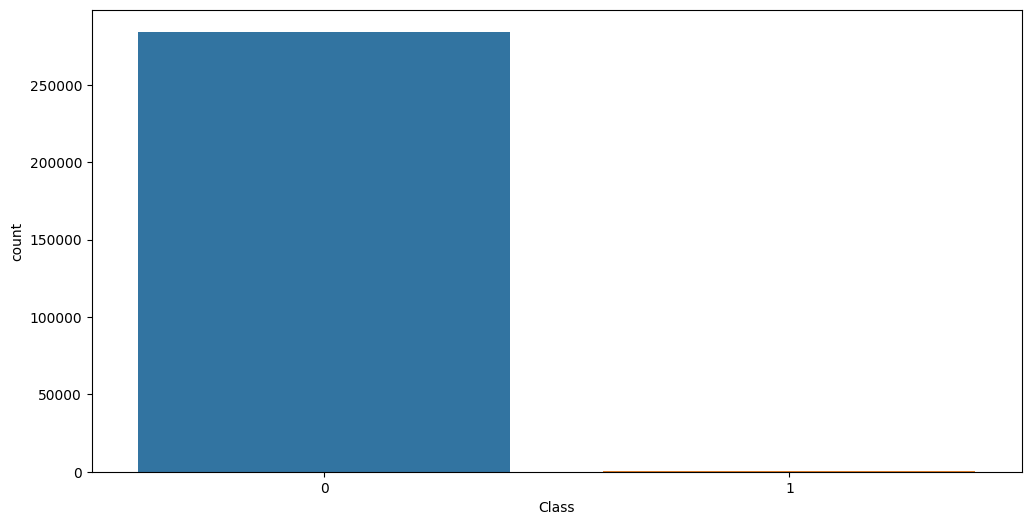

In [12]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Class', data = ccf)

3.1 Transforming the data

In [13]:
ccf['S_time'] = robscale.fit_transform(ccf['Time'].values.reshape(-1,1))
ccf['S_Amount'] = robscale.fit_transform(ccf[ 'Amount'].values.reshape(-1,1))

ccf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,S_time,S_Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-0.994983,1.783274
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.994983,-0.269825
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.994972,4.983721
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-0.994972,1.418291
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.994960,0.670579


In [14]:
ccf.drop(['Time', 'Amount'], axis=1, inplace = True)

In [15]:
ccf[['S_Amount', "S_time", 'Class']].describe()

,S_Amount,S_time,Class
count,284807.000000,284807.000000,284807.000000
mean,0.927124,0.118914,0.001727
std,3.495006,0.557903,0.041527
min,-0.307413,-0.994983,0.000000
25%,-0.229162,-0.358210,0.000000
50%,0.000000,0.000000,0.000000
75%,0.770838,0.641790,0.000000
max,358.683155,1.035022,1.000000


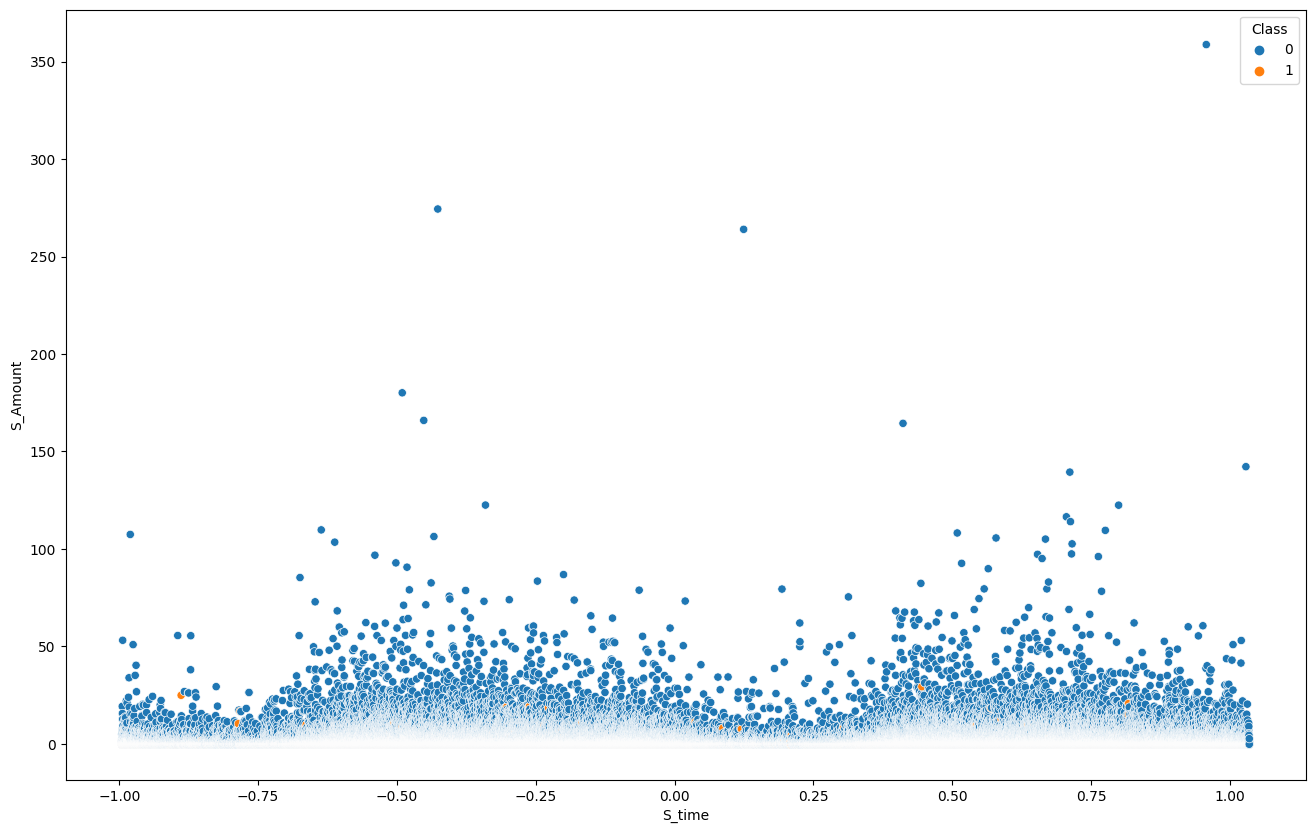

In [16]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="S_time", y='S_Amount', data=ccf, hue = 'Class')
plt.show()

3.2 Visualizing Fradulent Transactions

<Axes: xlabel='S_time', ylabel='S_Amount'>

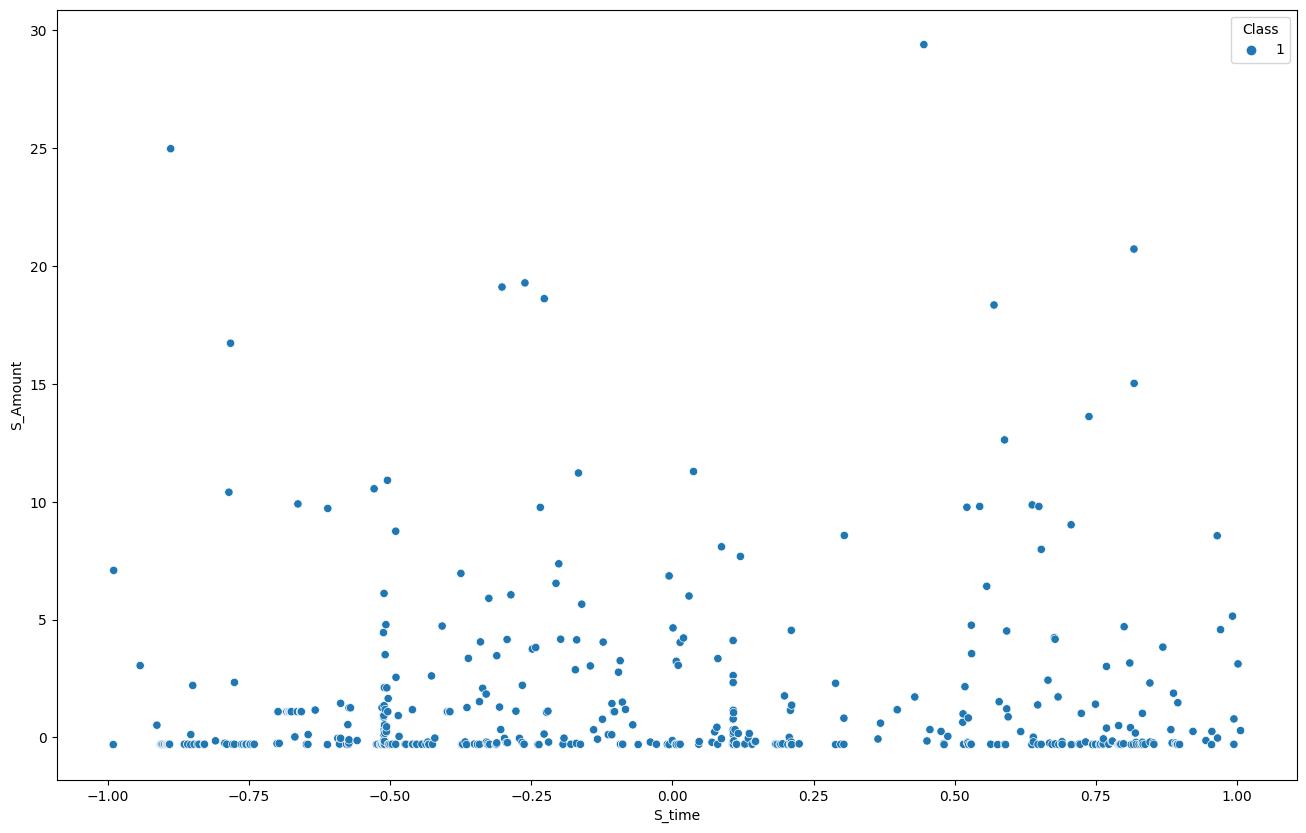

In [17]:
#Scatter plot for fradulent transactions, based on time and amount
com_fraud = ccf[ccf['Class']==1]

plt.figure(figsize=(16,10))
sns.scatterplot(x = 'S_time', y = "S_Amount", hue = "Class", data = com_fraud)

In [18]:
com_fraud[['S_Amount', "S_time", 'Class']].describe()

,S_Amount,S_time,Class
count,492.000000,492.000000,492.0
mean,1.400284,-0.046349,1.0
std,3.586715,0.561982,0.0
min,-0.307413,-0.990214,1.0
25%,-0.293440,-0.510468,1.0
50%,-0.178160,-0.107185,1.0
75%,1.172221,0.514468,1.0
max,29.398030,1.006309,1.0


3.3 Identifying Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2388685ea70>,
 'caps': [<matplotlib.lines.Line2D at 0x2388685efb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2388685e7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2388685f4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2388685f790>],
 'means': []}

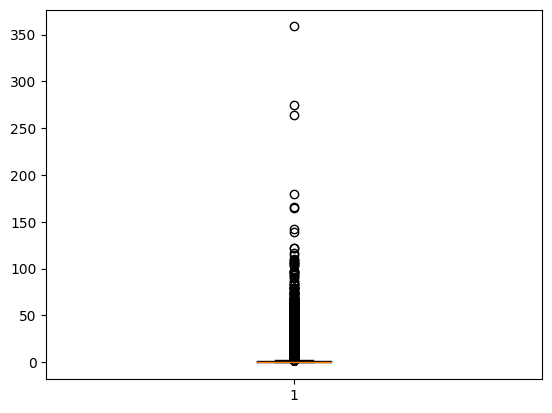

In [19]:
plt.boxplot(ccf['S_Amount'])

In [20]:
Q1 = ccf['S_Amount'].quantile(0.25)
Q3 = ccf['S_Amount'].quantile(0.75)
IQR = Q3 - Q1
UB = Q3 + 1.5 * IQR
outliers =(ccf['S_Amount'] > UB)
outliers

0         False
1         False
2          True
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806     True
Name: S_Amount, Length: 284807, dtype: bool

In [21]:
outliers.value_counts()

S_Amount
False    252903
True      31904
Name: count, dtype: int64

In [22]:
ccf_copy = ccf.copy()
ccf_copy['outliers']= outliers
ccf_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,S_time,S_Amount,outliers
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274,False
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825,False
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721,True
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291,False
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579,False


3.4 Working on Outliers

In [23]:
#creating a df only with outliers
ccf_outliers = ccf_copy[ccf_copy['outliers']==True]
ccf_outliers.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,S_time,S_Amount,outliers
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721,True
20,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,0.568521,...,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,0,-0.994796,2.930343,True
51,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006868,-0.278736,-0.230873,...,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,0,-0.994561,19.296444,True
64,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,0.516352,...,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,0,-0.994490,3.097324,True
85,-4.575093,-4.429184,3.402585,0.903915,3.002224,-0.491078,-2.705393,0.666451,1.922216,-0.614312,...,-0.971600,-0.114862,0.408300,-0.304576,0.547785,-0.456297,0,-0.994337,2.487389,True


In [24]:
ccf_outliers1 = ccf_outliers.drop(['outliers'], axis=1)
ccf_outliers1[['S_Amount', "S_time", 'Class']].describe()

,S_Amount,S_time,Class
count,31904.000000,31904.000000,31904.000000
mean,6.839253,0.102837,0.002852
std,8.181091,0.547595,0.053332
min,2.270942,-0.994972,0.000000
25%,3.041186,-0.387129,0.000000
50%,4.359673,-0.033764,0.000000
75%,7.388877,0.619242,0.000000
max,358.683155,1.035022,1.000000


In [25]:
ccf_outliers1['Class'].value_counts()

Class
0    31813
1       91
Name: count, dtype: int64

Insight: Out of 492 fradulent transactions, 91 are from Outlier data

<Axes: xlabel='S_time', ylabel='S_Amount'>

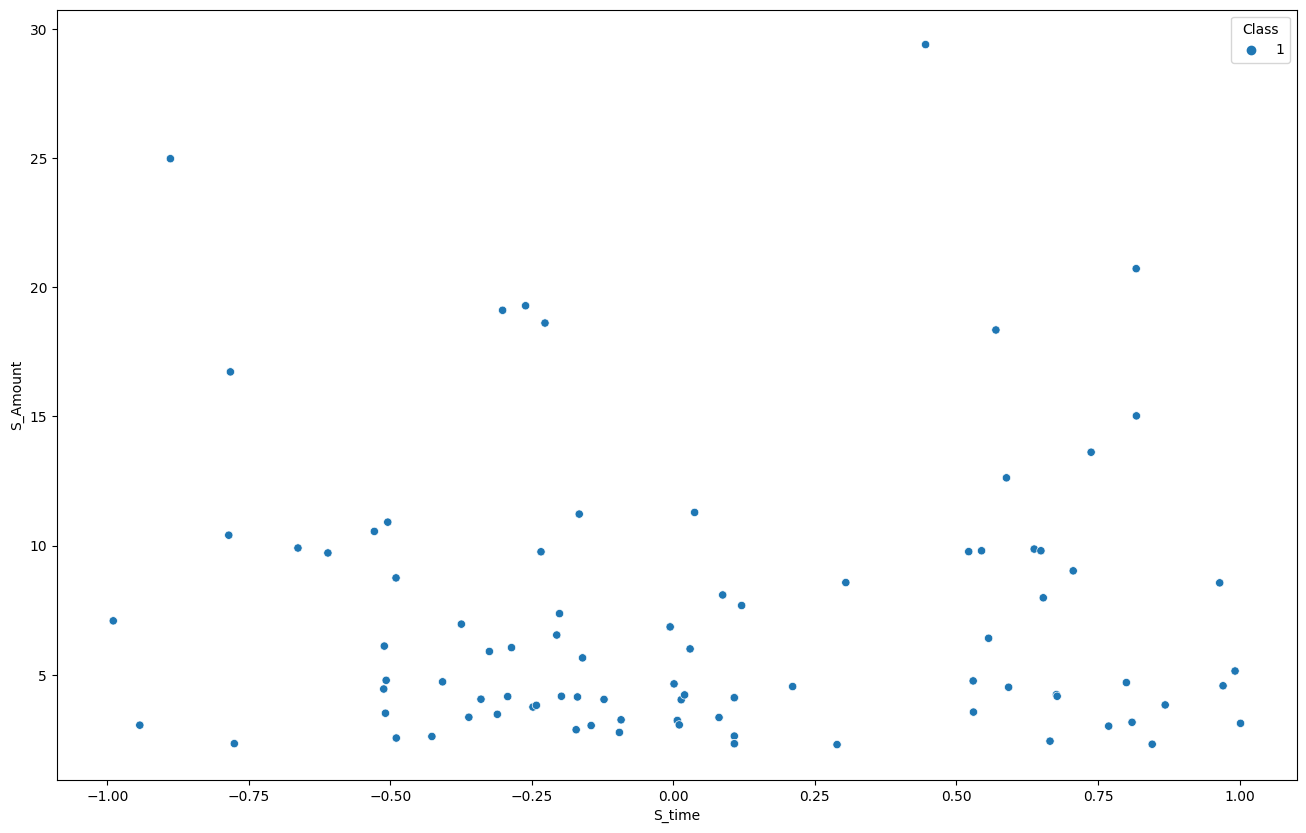

In [26]:
# Visualizing the fraud transactions of outliers
fraud_class = ccf_outliers1[ccf_outliers1["Class"]==1]
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'S_time', y = "S_Amount", hue = "Class", data = fraud_class)

<Axes: >

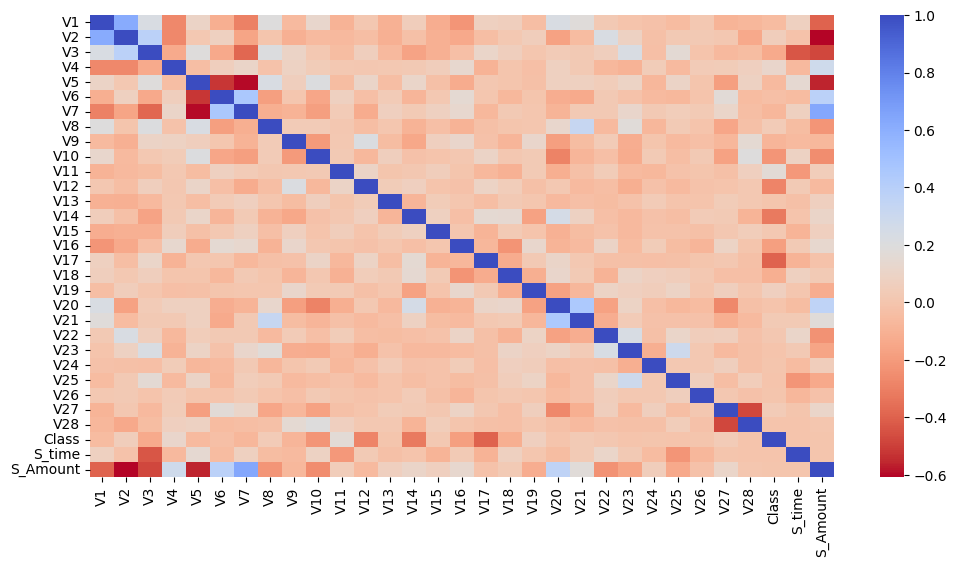

In [27]:
out_corr=ccf_outliers1.corr()
plt.figure(figsize=(12,6))
sns.heatmap(out_corr, cmap='coolwarm_r')

{'whiskers': [<matplotlib.lines.Line2D at 0x23883668280>,
 'caps': [<matplotlib.lines.Line2D at 0x238836687c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2388364bfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x23883668d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x23883668fa0>],
 'means': []}

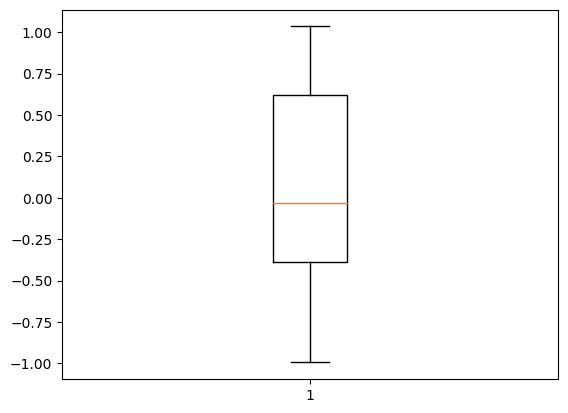

In [28]:
plt.boxplot(ccf_outliers1['S_time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x238836bafe0>,
 'caps': [<matplotlib.lines.Line2D at 0x238836bb520>,
 'boxes': [<matplotlib.lines.Line2D at 0x238836bad40>],
 'medians': [<matplotlib.lines.Line2D at 0x238836bba60>],
 'fliers': [<matplotlib.lines.Line2D at 0x238836bbd00>],
 'means': []}

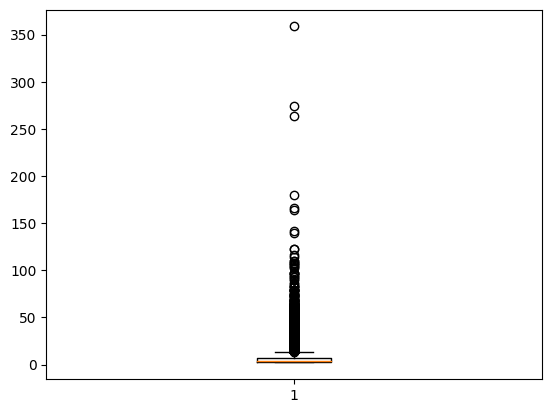

In [29]:
plt.boxplot(ccf_outliers1['S_Amount'])

In [30]:
ccf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,S_time,S_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


4. Model Building

In [31]:
x = ccf.drop('Class', axis=1)
y = ccf['Class']

In [32]:
x.shape

(284807, 30)

In [33]:
y.shape

(284807,)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=.33, random_state=1)

4.1 Logistic Regression

In [35]:
models_logreg = []

# Define parameters
C_values = [0.1, 1, 5, 10, 20, 30]

# Create and train the Logistic Regression models
results = []
for C in C_values:
    logreg = LogisticRegression(C=C, random_state=1, max_iter = 1000)
    logreg.fit(x_train, y_train)
    models_logreg.append(logreg)

    # Generate classification report for the model
    y_pred = logreg.predict(x_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy_train = logreg.score(x_train, y_train)
    accuracy_test = report['accuracy']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    precision = report['macro avg']['precision']
    results.append({'Model': logreg, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

# Create DataFrame from results
df_logreg = pd.DataFrame(results)
# Sort DataFrame by Recall in descending order
df_logreg_sorted = df_logreg.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_log = df_logreg_sorted[:1]
# Print the sorted DataFrame
df_logreg_sorted[:10]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
2,"LogisticRegression(C=5, max_iter=1000, random_...",0.999266,0.999170,0.917944,0.793828,0.845030
3,"LogisticRegression(C=10, max_iter=1000, random...",0.999266,0.999170,0.917944,0.793828,0.845030
4,"LogisticRegression(C=20, max_iter=1000, random...",0.999266,0.999170,0.917944,0.793828,0.845030
5,"LogisticRegression(C=30, max_iter=1000, random...",0.999266,0.999170,0.917944,0.793828,0.845030
0,"LogisticRegression(C=0.1, max_iter=1000, rando...",0.999219,0.999159,0.913961,0.793823,0.843663
1,"LogisticRegression(C=1, max_iter=1000, random_...",0.999266,0.999159,0.917146,0.790450,0.842419


4.1.1 Logistic regression - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93839
           1       0.84      0.59      0.69       148

    accuracy                           1.00     93987
   macro avg       0.92      0.79      0.85     93987
weighted avg       1.00      1.00      1.00     93987



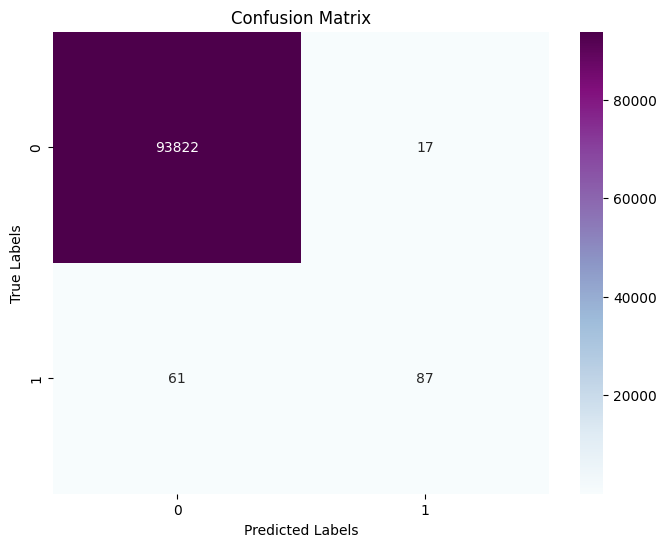

In [36]:
model_index = df_logreg_sorted['Recall'].idxmax()
log_best_model = models_logreg[model_index]
log_best_model.fit(x_train, y_train)
y_log = log_best_model.predict(x_test)
print(classification_report(y_test, y_log))

conf_matrix = confusion_matrix(y_test, y_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

4.2 Decision Tree

In [37]:
models_DT = []

# Define parameters
max_depths = [3, 5, 7]
max_features = ['sqrt', 'log2', None]
min_samples_leafs = [1, 3, 5, 10]
max_leaf_nodes = [5, 10, 15, 20]

# Create and train the decision tree models
results = []
for max_depth in max_depths:
    for max_feature in max_features:
        for min_samples_leaf in min_samples_leafs:
            for max_leaf_node in max_leaf_nodes:
                DT = DecisionTreeClassifier(criterion='gini', max_depth=max_depth,
                                               max_features=max_feature, min_samples_leaf=min_samples_leaf,
                                               max_leaf_nodes=max_leaf_node, random_state=1)
                DT.fit(x_train, y_train)
                models_DT.append(DT)

                # Generate classification report for the model
                y_pred = DT.predict(x_test)
                report = classification_report(y_test, y_pred, output_dict=True)
                accuracy_train = DT.score(x_train, y_train)
                accuracy_test = report['accuracy']
                recall = report['macro avg']['recall']
                f1_score = report['macro avg']['f1-score']
                precision = report['macro avg']['precision']
                results.append({'Model': DT, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score })

# Create DataFrame from results
df_DT = pd.DataFrame(results)
# Sort DataFrame by Recall in descending order
df_DT_sorted = df_DT.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_DT_sorted[:5]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
131,"DecisionTreeClassifier(max_depth=7, max_leaf_n...",0.999665,0.999425,0.945615,0.861417,0.899110
83,"DecisionTreeClassifier(max_depth=5, max_leaf_n...",0.999644,0.999425,0.945615,0.861417,0.899110
135,"DecisionTreeClassifier(max_depth=7, max_leaf_n...",0.999644,0.999425,0.948929,0.858044,0.898352
87,"DecisionTreeClassifier(max_depth=5, max_leaf_n...",0.999623,0.999425,0.948929,0.858044,0.898352
89,"DecisionTreeClassifier(max_depth=5, max_leaf_n...",0.999549,0.999330,0.917099,0.857996,0.885287


4.2.1 Decision Tree - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93839
           1       0.89      0.72      0.80       148

    accuracy                           1.00     93987
   macro avg       0.95      0.86      0.90     93987
weighted avg       1.00      1.00      1.00     93987



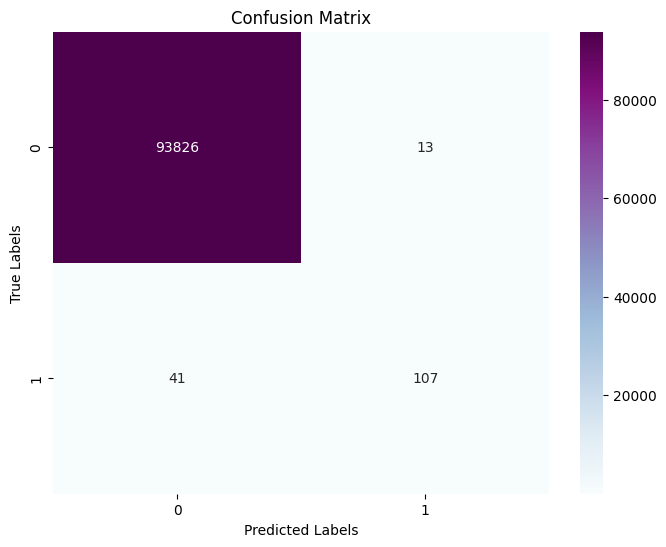

In [38]:
model_index = df_DT_sorted['Recall'].idxmax()
DT_best = models_DT[model_index]
DT_best.fit(x_train, y_train)
y_dt = DT_best.predict(x_test)
print(classification_report(y_test, y_dt))


conf_matrix = confusion_matrix(y_test, y_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [58]:
top_DT = df_DT_sorted[:1]

4.3 XG Boost

In [39]:
XGB_model = []
results = []

# Define parameters
n_estimators = [100, 250, 500]
learning_rates = [0.1, 0.33, 0.5, 1.0]
max_depths = [3, 5, 7]

# Create and train the XGBoost models
for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            XGB = XGBClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth, random_state=1)
            XGB.fit(x_train, y_train)
            XGB_model.append(XGB)

            y_pred = XGB.predict(x_test)
            report = classification_report(y_test, y_pred, output_dict=True)
            accuracy_test = XGB.score(x_test, y_test)
            accuracy_test = report['accuracy']
            recall = report['macro avg']['recall']
            f1_score = report['macro avg']['f1-score']
            precision = report['macro avg']['precision']
            results.append({'Model':XGB, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

# Create DataFrame from results
df_XGB = pd.DataFrame(results)

# Sort DataFrame by Recall in descending order
df_XGB_sorted = df_XGB.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_XGB = df_XGB_sorted[:1]
# Print the sorted DataFrame
df_XGB_sorted[:5]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
24,"XGBClassifier(base_score=None, booster=None, c...",0.999534,0.999542,0.963234,0.885087,0.920550
20,"XGBClassifier(base_score=None, booster=None, c...",0.999534,0.999553,0.970647,0.881719,0.921530
27,"XGBClassifier(base_score=None, booster=None, c...",0.999534,0.999553,0.970647,0.881719,0.921530
32,"XGBClassifier(base_score=None, booster=None, c...",0.999534,0.999542,0.966756,0.881714,0.919960
8,"XGBClassifier(base_score=None, booster=None, c...",0.999534,0.999542,0.970396,0.878341,0.919361


4.3.1 XG Boost - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93839
           1       0.93      0.77      0.84       148

    accuracy                           1.00     93987
   macro avg       0.96      0.89      0.92     93987
weighted avg       1.00      1.00      1.00     93987



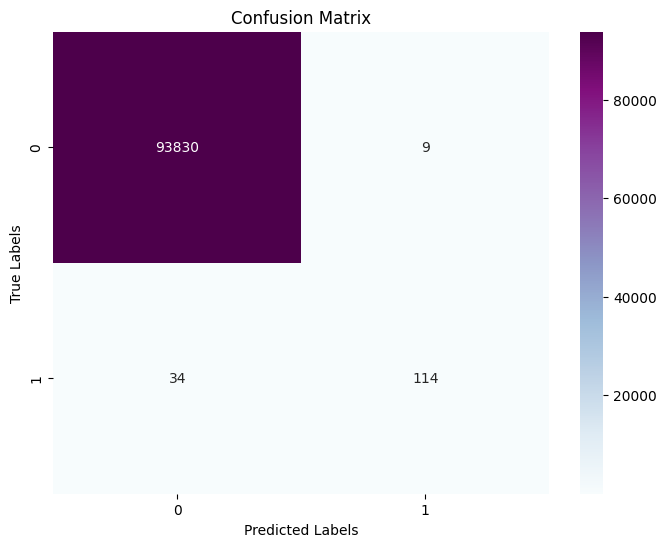

In [40]:
model_index = df_XGB_sorted['Recall'].idxmax()
XGB_best_model = XGB_model[model_index]
XGB_best_model.fit(x_train, y_train)
y_xgb = XGB_best_model.predict(x_test)
print(classification_report(y_test, y_xgb))

conf_matrix = confusion_matrix(y_test, y_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

4.4 Ada Boost

In [45]:
models_ada = []
results = []


n_estimators = [50, 100, 200]
learning_rates = [0.1,0.33, 0.5, 1.0]

for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        ada = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate, random_state=1)
        ada.fit(x_train, y_train)
        models_ada.append(ada)
        
        # Generate classification report for the model
        y_pred = ada.predict(x_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        accuracy_train = ada.score(x_train, y_train)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        f1_score = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        results.append({'Model': str(ada),'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'precision': precision, 'Recall': recall, "f1-score":f1_score})

df_ada = pd.DataFrame(results)
df_ada_sorted = df_ada.sort_values(by=['Recall', 'precision', 'f1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
top_ada = df_ada_sorted[:1]
df_ada_sorted[:5]

,Model,Train Accuracy,Test Accuracy,precision,Recall,f1-score
11,"AdaBoostClassifier(n_estimators=200, random_st...",0.999633,0.999468,0.947384,0.874931,0.907955
9,"AdaBoostClassifier(learning_rate=0.33, n_estim...",0.999450,0.999404,0.935271,0.864780,0.896910
10,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.999502,0.999394,0.937793,0.858028,0.893900
7,"AdaBoostClassifier(n_estimators=100, random_st...",0.999471,0.999319,0.921891,0.847872,0.881311
6,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.999366,0.999308,0.924119,0.841120,0.878104


4.4.1 Ada Boost - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93839
           1       0.90      0.75      0.82       148

    accuracy                           1.00     93987
   macro avg       0.95      0.87      0.91     93987
weighted avg       1.00      1.00      1.00     93987



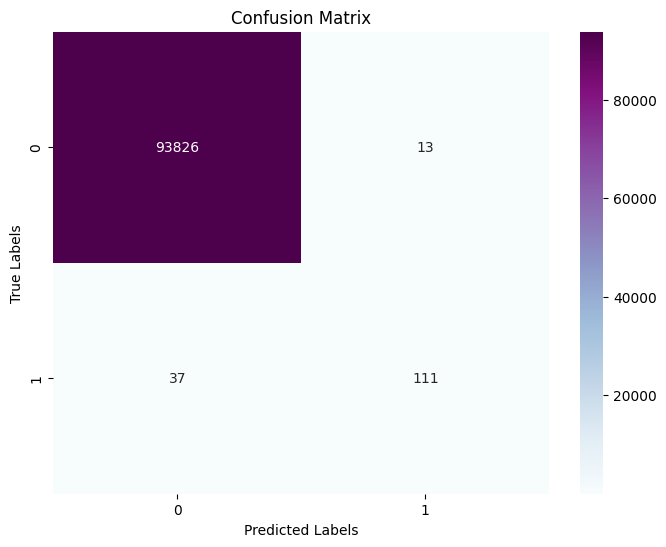

In [46]:
model_index = df_ada_sorted['Recall'].idxmax()
ada_best_model = models_ada[model_index]
ada_best_model.fit(x_train, y_train)
y_ada = ada_best_model.predict(x_test)
print(classification_report(y_test, y_ada))

conf_matrix = confusion_matrix(y_test, y_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

5. Implementing SMOTE

In [48]:
smote = SMOTE(random_state=1)
x_s = ccf.drop('Class', axis=1)
y_s = ccf['Class']
x_smote , y_smote = smote.fit_resample(x_s,y_s)
x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(x_smote , y_smote , test_size=.33, random_state=1)

5.1 Logistic Regression with SMOTE

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import pandas as pd

models_logreg_s = []

# Define parameters
C_values = [0.1, 1, 5, 10, 20, 30]

# Create and train the Logistic Regression models
results = []
for C in C_values:
    logreg_s = LogisticRegression(C=C, random_state=1, max_iter=1000)
    logreg_s.fit(x_train_s, y_train_s)
    models_logreg_s.append(logreg_s)

    # Generate classification report for the model
    y_pred_s = logreg_s.predict(x_test_s)
    report = classification_report(y_test_s, y_pred_s, output_dict=True)
    accuracy_train = logreg_s.score(x_train_s, y_train_s)
    accuracy_test = report['accuracy']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    precision = report['macro avg']['precision']
    results.append({'Model': logreg_s, 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'Precision': precision, 'Recall': recall, "F1-score": f1_score})

# Create DataFrame from results
df_logreg_s = pd.DataFrame(results)
# Sort DataFrame by Recall, Precision, F1-score, Test Accuracy, Train Accuracy in descending order
df_logreg_sorted_s = df_logreg_s.sort_values(by=['Recall', 'Precision', 'F1-score', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_logreg_sorted_s.head(5)

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
5,"LogisticRegression(C=30, max_iter=1000, random...",0.949095,0.949816,0.951049,0.949784,0.949779
4,"LogisticRegression(C=20, max_iter=1000, random...",0.949089,0.949816,0.951050,0.949784,0.949779
2,"LogisticRegression(C=5, max_iter=1000, random_...",0.949095,0.949810,0.951044,0.949779,0.949773
3,"LogisticRegression(C=10, max_iter=1000, random...",0.949095,0.949810,0.951044,0.949779,0.949773
1,"LogisticRegression(C=1, max_iter=1000, random_...",0.949089,0.949800,0.951035,0.949768,0.949763


5.1.1 Logistic regression with SMOTE - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     93938
           1       0.97      0.92      0.95     93710

    accuracy                           0.95    187648
   macro avg       0.95      0.95      0.95    187648
weighted avg       0.95      0.95      0.95    187648



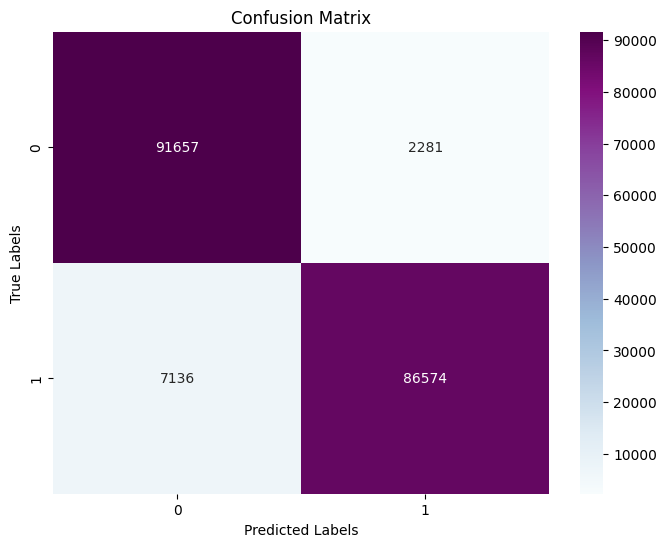

In [50]:
model_index_s = df_logreg_sorted_s['Recall'].idxmax()
log_best_model_s = models_logreg_s[model_index_s]
log_best_model_s.fit(x_train_s, y_train_s)
y_log_s = log_best_model_s.predict(x_test_s)
print(classification_report(y_test_s, y_log_s))

conf_matrix = confusion_matrix(y_test_s, y_log_s)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [59]:
top_log_s = df_logreg_sorted_s[:1]

5.2 Decision Tree with SMOTE

In [51]:
models_DT_s = []

# Define parameters
max_depths = [3, 5, 7]
max_features = ['sqrt', 'log2', None]
min_samples_leafs = [1, 3, 5, 10]
max_leaf_nodes = [5, 10, 15, 20]

# Create and train the decision tree models
results_s = []
for max_depth in max_depths:
    for max_feature in max_features:
        for min_samples_leaf in min_samples_leafs:
            for max_leaf_node in max_leaf_nodes:
                DT_s = DecisionTreeClassifier(criterion='gini', max_depth=max_depth,
                                               max_features=max_feature, min_samples_leaf=min_samples_leaf,
                                               max_leaf_nodes=max_leaf_node, random_state=1)
                DT_s.fit(x_train_s, y_train_s)
                models_DT_s.append(DT_s)

                # Generate classification report for the model
                y_pred_s = DT_s.predict(x_test_s)
                report = classification_report(y_test_s, y_pred_s, output_dict=True)
                accuracy_train_s = DT_s.score(x_train_s, y_train_s)
                accuracy_test = report['accuracy']
                recall = report['macro avg']['recall']
                f1_score = report['macro avg']['f1-score']
                precision = report['macro avg']['precision']
                results_s.append({'Model': DT_s, 'Train Accuracy': accuracy_train_s, 'Test Accuracy': accuracy_test, 'Precision': precision, 'Recall': recall, "F1-score": f1_score})

# Create DataFrame from results
df_DT_s = pd.DataFrame(results_s)
# Sort DataFrame by Recall, Precision, F1-score, Test Accuracy, Train Accuracy in descending order
df_DT_sorted_s = df_DT_s.sort_values(by=['Recall', 'Precision', 'F1-score', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
df_DT_sorted_s[:5]

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
131,"DecisionTreeClassifier(max_depth=7, max_leaf_n...",0.959822,0.959632,0.959898,0.959618,0.959625
135,"DecisionTreeClassifier(max_depth=7, max_leaf_n...",0.959822,0.959632,0.959898,0.959618,0.959625
139,"DecisionTreeClassifier(max_depth=7, max_leaf_n...",0.959822,0.959632,0.959898,0.959618,0.959625
143,"DecisionTreeClassifier(max_depth=7, max_leaf_n...",0.959822,0.959632,0.959898,0.959618,0.959625
130,"DecisionTreeClassifier(max_depth=7, max_leaf_n...",0.950617,0.951111,0.951571,0.951091,0.951097


5.2.1 Decision Tree with SMOTE - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     93938
           1       0.97      0.95      0.96     93710

    accuracy                           0.96    187648
   macro avg       0.96      0.96      0.96    187648
weighted avg       0.96      0.96      0.96    187648



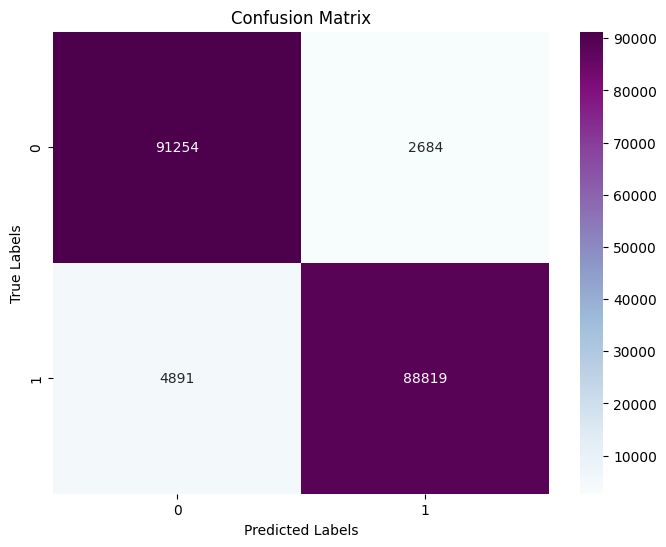

In [52]:
model_index_s = df_DT_sorted_s['Recall'].idxmax()
DT_best_model_s = models_DT_s[model_index_s]
DT_best_model_s.fit(x_train_s, y_train_s)
y_DT_s = DT_best_model_s.predict(x_test_s)
print(classification_report(y_test_s, y_DT_s))

conf_matrix = confusion_matrix(y_test_s, y_DT_s)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [60]:
top_DT_s = df_DT_sorted_s[:1]

5.3 XG Boost SMOTE

In [53]:
XGB_model_s = []
results_s = []

# Define parameters
n_estimators = [100, 250, 400]
learning_rates = [0.1, 0.33, 0.5, 1.0]
max_depths = [3, 5, 7]

# Create and train the XGBoost models
for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        for max_depth in max_depths:
            XGB_s = XGBClassifier(n_estimators=n_estimator, learning_rate=learning_rate, max_depth=max_depth, random_state=1)
            XGB_s.fit(x_train_s, y_train_s)
            XGB_model_s.append(XGB_s)

            y_pred_s = XGB_s.predict(x_test_s)
            report = classification_report(y_test_s, y_pred_s, output_dict=True)
            accuracy_test = report['accuracy']
            recall = report['macro avg']['recall']
            f1_score = report['macro avg']['f1-score']
            precision = report['macro avg']['precision']
            results_s.append({'Model': str(XGB_s), 'Train Accuracy': accuracy_test, 'Test Accuracy': accuracy_test, 'Precision': precision, 'Recall': recall, 'F1-score': f1_score})

# Create DataFrame from results
df_XGB_s = pd.DataFrame(results_s)

# Sort DataFrame by Recall in descending order
df_XGB_sorted_s = df_XGB_s.sort_values(by=['Recall', 'Precision', 'F1-score', 'Test Accuracy', 'Train Accuracy'], ascending=False)
top_XGB_s = df_XGB_sorted_s[:1]
# Print the sorted DataFrame
df_XGB_sorted_s[:5]


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
8,"XGBClassifier(base_score=None, booster=None, c...",0.999824,0.999824,0.999824,0.999824,0.999824
32,"XGBClassifier(base_score=None, booster=None, c...",0.999824,0.999824,0.999824,0.999824,0.999824
20,"XGBClassifier(base_score=None, booster=None, c...",0.999813,0.999813,0.999813,0.999814,0.999813
17,"XGBClassifier(base_score=None, booster=None, c...",0.999797,0.999797,0.999797,0.999798,0.999797
26,"XGBClassifier(base_score=None, booster=None, c...",0.999797,0.999797,0.999797,0.999798,0.999797


5.3.1 XG Boost with SMOTE - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93938
           1       1.00      1.00      1.00     93710

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648



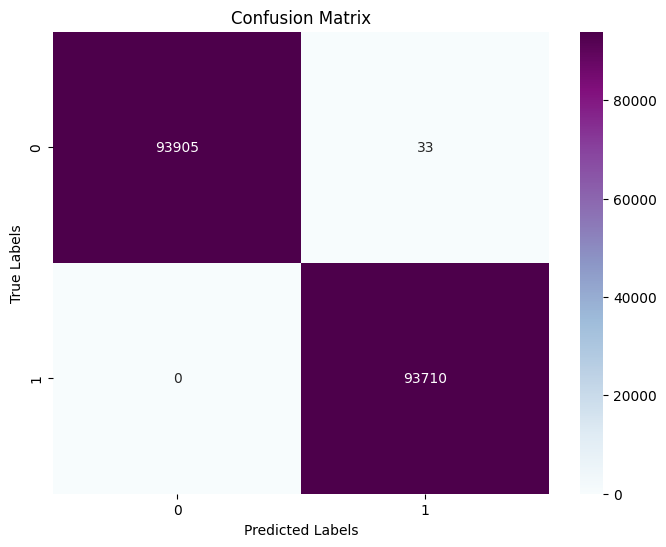

In [54]:
model_index_s = df_XGB_sorted_s['Recall'].idxmax()
XGB_best_model_s = XGB_model[model_index_s]
XGB_best_model_s.fit(x_train_s, y_train_s)
y_XGB_s = XGB_best_model_s.predict(x_test_s)
print(classification_report(y_test_s, y_XGB_s))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_s, y_XGB_s)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

5.4 Ada Boost with SMOTE

In [55]:
models_ada_s = []

# Define parameters
n_estimators = [50, 100, 200]
learning_rates = [0.1, 0.33, 0.5, 1.0]

# Create and train the AdaBoostClassifier models
results_s = []
for n_estimator in n_estimators:
    for learning_rate in learning_rates:
        ada_s = AdaBoostClassifier(n_estimators=n_estimator, learning_rate=learning_rate, random_state=1)
        ada_s.fit(x_train_s, y_train_s)
        models_ada_s.append(ada_s)

        # Generate classification report for the model
        y_pred_s = ada_s.predict(x_test_s)
        report = classification_report(y_test_s, y_pred_s, output_dict=True)
        accuracy_train = ada_s.score(x_train_s, y_train_s)
        accuracy_test = report['accuracy']
        recall = report['macro avg']['recall']
        f1_score = report['macro avg']['f1-score']
        precision = report['macro avg']['precision']
        results_s.append({'Model': str(ada_s), 'Train Accuracy': accuracy_train, 'Test Accuracy': accuracy_test, 'Precision': precision, 'Recall': recall, 'F1-score': f1_score})

# Create DataFrame from results
df_ada_s = pd.DataFrame(results_s)
df_ada_sorted_s = df_ada_s.sort_values(by=['Recall', 'Precision', 'F1-score', 'Test Accuracy', 'Train Accuracy'], ascending=False)

# Print the sorted DataFrame
top_ada_s = df_ada_sorted_s[:1]
df_ada_sorted_s[:5]


,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
11,"AdaBoostClassifier(n_estimators=200, random_st...",0.982619,0.981854,0.981912,0.981848,0.981854
10,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.975558,0.975385,0.975595,0.975372,0.975382
7,"AdaBoostClassifier(n_estimators=100, random_st...",0.974791,0.974676,0.974797,0.974667,0.974674
9,"AdaBoostClassifier(learning_rate=0.33, n_estim...",0.969765,0.969571,0.969981,0.969553,0.969563
6,"AdaBoostClassifier(learning_rate=0.5, n_estima...",0.966788,0.966389,0.966847,0.966370,0.966380


5.4.1 Ada Boost with SMOTE - Classification report and Confusion Matrix

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     93938
           1       0.99      0.98      0.98     93710

    accuracy                           0.98    187648
   macro avg       0.98      0.98      0.98    187648
weighted avg       0.98      0.98      0.98    187648



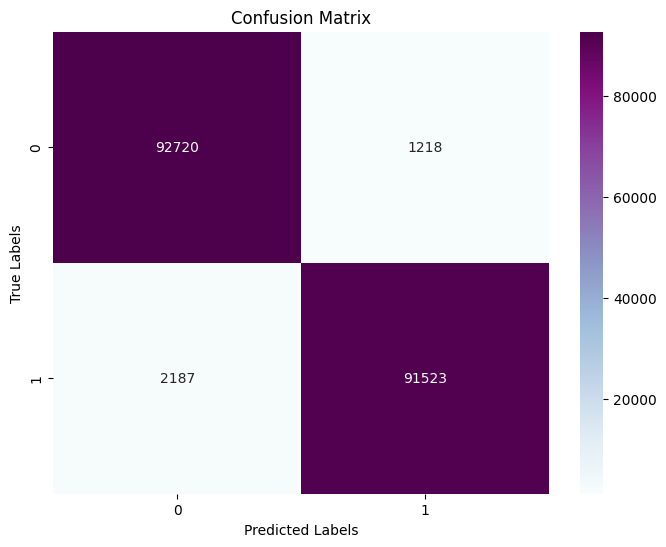

In [56]:
model_index_s = df_ada_sorted_s['Recall'].idxmax()
ada_best_model_s = models_ada_s[model_index_s]
ada_best_model_s.fit(x_train_s, y_train_s)
y_ada_s = ada_best_model_s.predict(x_test_s)
print(classification_report(y_test_s, y_ada_s))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_s, y_ada_s)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

6. DataFrame of top models

In [72]:
dataframes = [top_log, top_DT, top_ada, top_XGB,]
model_names = ['Logistic Regression','Decision Tree', 'Ada Boost', 'XG Boost' ]
df_combined = pd.concat(dataframes)
df_combined['Model'] = model_names
df_combined.rename(columns={'f1-score':'F1-score','precision':'Precision' }, inplace = True)
df_combined            

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
2,Logistic Regression,0.999266,0.999170,0.917944,0.793828,0.845030
131,Decision Tree,0.999665,0.999425,0.945615,0.861417,0.899110
11,Ada Boost,0.999633,0.999468,0.947384,0.874931,0.907955
24,XG Boost,0.999534,0.999542,0.963234,0.885087,0.920550


In [67]:
dataframes_s = [ top_log_s, top_DT_s, top_ada_s, top_XGB_s, ]
model_names_s = [ 'Logistic Regression with SMOTE','Decision Tree with SMOTE', 'Ada Boost with SMOTE', 'XG Boost with SMOTE' ]
df_combined_s = pd.concat(dataframes_s)
df_combined_s['Model'] = model_names_s
df_combined_s

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
5,Logistic Regression with SMOTE,0.949095,0.949816,0.951049,0.949784,0.949779
131,Decision Tree with SMOTE,0.959822,0.959632,0.959898,0.959618,0.959625
11,Ada Boost with SMOTE,0.982619,0.981854,0.981912,0.981848,0.981854
8,XG Boost with SMOTE,0.999824,0.999824,0.999824,0.999824,0.999824


In [73]:
df = pd.concat([df_combined, df_combined_s])
df_sorted =  df.sort_values(by=['Recall', 'Precision', 'F1-score','Test Accuracy', 'Train Accuracy'], ascending=False)
df_sorted

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-score
8,XG Boost with SMOTE,0.999824,0.999824,0.999824,0.999824,0.999824
11,Ada Boost with SMOTE,0.982619,0.981854,0.981912,0.981848,0.981854
131,Decision Tree with SMOTE,0.959822,0.959632,0.959898,0.959618,0.959625
5,Logistic Regression with SMOTE,0.949095,0.949816,0.951049,0.949784,0.949779
24,XG Boost,0.999534,0.999542,0.963234,0.885087,0.920550
11,Ada Boost,0.999633,0.999468,0.947384,0.874931,0.907955
131,Decision Tree,0.999665,0.999425,0.945615,0.861417,0.899110
2,Logistic Regression,0.999266,0.999170,0.917944,0.793828,0.845030


7. Best Model

In [57]:
print(XGB_best_model_s)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93938
           1       1.00      1.00      1.00     93710

    accuracy                           1.00    187648
   macro avg       1.00      1.00      1.00    187648
weighted avg       1.00      1.00      1.00    187648



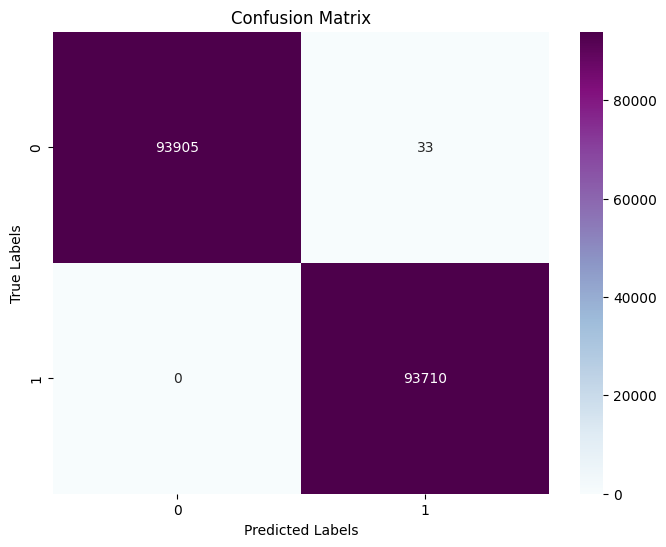

In [74]:
model_index_s = df_XGB_sorted_s['Recall'].idxmax()
XGB_best_model_s = XGB_model[model_index_s]
XGB_best_model_s.fit(x_train_s, y_train_s)
y_XGB_s = XGB_best_model_s.predict(x_test_s)
print(classification_report(y_test_s, y_XGB_s))

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_s, y_XGB_s)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='BuPu')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()